<a id='top'></a>
# Schools, Hospitals & House Prices in the DC Metro Area

#### Contributors: Muoyo Okome, VJ Paravastu


<a id='toc'></a>
### Table of Contents
1. <a href='#problemstatement'>Problem Statement</a>
2. <a href='#datasources'>Data Sources</a>
3. <a href='#datacleaning'>Data Cleaning</a>
4. <a href='#hypothesistests'>Hypothesis Tests</a>
5. <a href='#findings'>Findings</a>
6. <a href='#nextsteps'>Next Steps</a>

In [1]:
# Import necessary libraries
import warnings
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
warnings.filterwarnings('ignore')

<a id='problemstatement'></a>
### Problem Statement

The goal of this analysis is to better understand house prices in the DC Metro Area, and some of the factors they may have a relationship with, viewed at the county level. 

Specifically we looked at the median house price in each county, the number of hospitals per county, the number of public schools per county, and the number of private schools per county. We also examined how these variables differed in subsets of the poplulation with lower house prices vs higher house prices.

<a href='#top'>Back to Top ↑</a>

<a id='datasources'></a>
### Data Sources

We sourced our data from Zillow, the Homeland Infrastructure Foundation, and the US Census Bureau, and merged the data together at the county level.

#### <b><a href='https://www.zillow.com/research/data/'>Zillow Home Value Index</a></b>

- <b><a href='https://www.zillow.com/research/data/'>Housing:</a></b> Zillow Home Value Index (ZHVI): A smoothed, seasonally adjusted measure of the typical home value and market changes across a given region and housing type. Zillow has published <a href='https://www.zillow.com/research/zhvi-methodology-2019-highlights-26221/'>an overview of ZHVI</a> and <a href='https://www.zillow.com/research/zhvi-methodology-2019-deep-26226/'>a deep-dive into its methodology</a>.

#### <b><a href='https://hifld-geoplatform.opendata.arcgis.com/'>HIFLD Open Data</a></b>

- <b><a href='https://hifld-geoplatform.opendata.arcgis.com/datasets/87376bdb0cb3490cbda39935626f6604_0'>Public Schools:</a></b> This Public Schools feature dataset is composed of all Public elementary and secondary education facilities in the United States as defined by the Common Core of Data(CCD, <a href='https://nces.ed.gov/ccd/'>https://nces.ed.gov/ccd/</a> ), National Center for Education Statistics (NCES, <a href='https://nces.ed.gov'>https://nces.ed.gov</a> ), US Department of Education for the 2015-2016 school year. This includes all Kindergarten through 12th grade schools as tracked by the Common Core of Data. 

- <b><a href=''>Private Schools:</a></b> This Private Schools feature dataset is composed of private elementary and secondary education facilities in the United States as defined by the Private School Survey (PSS, https://nces.ed.gov/surveys/pss/), National Center for Education Statistics (NCES, https://nces.ed.gov), US Department of Education for the 2015-2016 school year. This includes all prekindergarten through 12th grade schools as tracked by the PSS.

- <b><a href='https://hifld-geoplatform.opendata.arcgis.com/datasets/6ac5e325468c4cb9b905f1728d6fbf0f_0'>Hospitals:</a></b> This feature class/shapefile contains locations of Hospitals for 50 US states, Washington D.C., US territories of Puerto Rico, Guam, American Samoa, Northern Mariana Islands, Palau, and Virgin Islands. 

#### <b><a href='https://www2.census.gov'>US Census Bureau</a></b>

- <a href='https://www.census.gov/data/tables/time-series/demo/popest/2010s-counties-detail.html#par_textimage_1383669527'>Population Data</a> This dataset features all the files containing Vintage 2018 county population estimates by demographic characteristics.
<br> 

<a href='#top'>Back to Top ↑</a>

<a id='datacleaning'></a>
### Data Cleaning

Before beginning analysis, we limited our data from Zillow to 22 of the 23 counties of the <a href='https://en.wikipedia.org/wiki/Washington_metropolitan_area'>Washington DC Metro Area</a>. (Rappahannock County, VA, the smallest county in the area with a population of less than 7500 people did not have enough data to work with. We also chose to focus only on the June 2019 Median Price Estimates column, dropping all other months, as well as excluding a few other columns we didn't need.

Because the datasets from Zillow & HIFLD Open Data used slightly different conventions for the county names, we created a dictionary that used Zillow's county names as the keys and <a href='https://en.wikipedia.org/wiki/FIPS_county_code'>FIPS County Codes</a> as the values, allowing us to easily merge with the HIFLD datasets for Public Schools, Private Schools, and Hospitals, which all featured a CountyFIPS column.

Finally, we merged in the population data from US Census by County Name and stored the number of Public & Private Schools and Hospitals in each county, as well as the ratios between Public & Private Schools, and the number of Hospitals, Schools, Public Schools, and Private Schools per person, to be used later on.

In [2]:
# Read in original data
df_housing = pd.read_csv('../data/County_Zhvi_AllHomes.csv', encoding='latin1')
df_public_schools = pd.read_csv('../data/Public_Schools.csv')
df_private_schools = pd.read_csv('../data/Private_Schools.csv')
df_hospitals = pd.read_csv('../data/Hospitals.csv')
df_population = pd.read_csv('../data/PEP_2018_PEPANNRES_with_ann.csv', encoding='latin1')

To make the project more modular and easier to follow & build upon, we created separate .py files to handle the heavy lifting for our data cleaning, visualizations, and hypothesis tests, as well as a class called <b>DCMetroInfo</b> (located in <b>utils.py</b>), which stores several subsets of the DC Metro Area counties that we repeatedly use for our statistical tests and visualizations. You can see our .py files and <b>DCMetroInfo</b> object, <b>dcmi</b>, directly below.

In [3]:
# Clean data & load into final dataframe
%run ../python_files/data_cleaning

In [4]:
df_dcmetro = clean_data(df_housing, df_public_schools, df_private_schools, df_hospitals, df_population)

In [83]:
# Import python files we've created to help
%run ../python_files/utils
%run ../python_files/hypothesis_tests
%run ../python_files/visualizations

# Additional calculations about DC Metro Counties to be used for tests & visualizations
dcmi = DCMetroInfo(df_dcmetro)



<a href='#top'>Back to Top ↑</a>

<a id='hypothesistests'></a>
### Hypothesis Tests

In [84]:
# Chi Square Test - p value = 0.0330062576612325

chi2_contingency([[ len(dcmi.high_price_low_pct_private_schools), len(dcmi.high_price_high_pct_private_schools) ],
                  [ len(dcmi.low_price_low_pct_private_schools), len(dcmi.low_price_high_pct_private_schools) ]])

(4.545454545454546, 0.0330062576612325, 1, array([[5.5, 5.5],
        [5.5, 5.5]]))

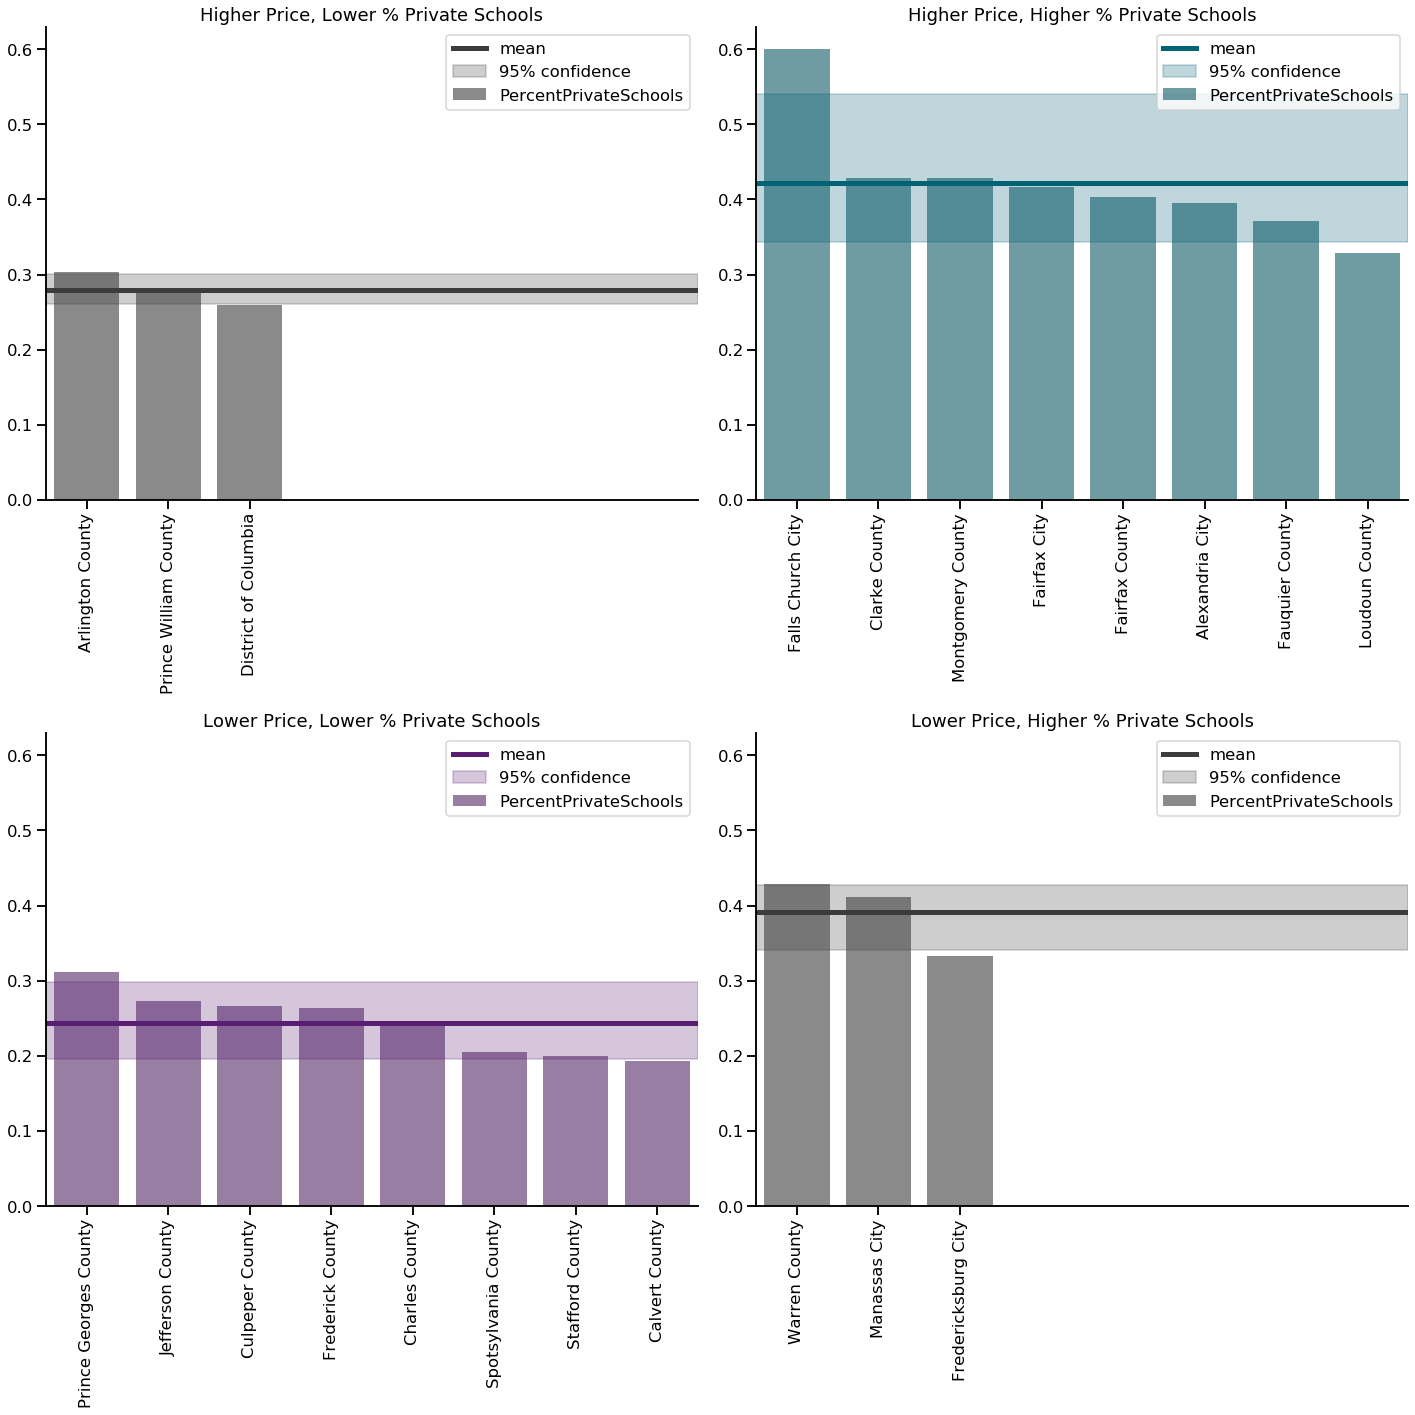

In [85]:
barplots_2x2_matrix(dcmi, 'RegionName', 'PercentPrivateSchools');

In [86]:
# Z tests comparing counties with lower house prices to counties with higher house prices

In [87]:
ztest (dcmi.low_price_counties['PeoplePerHospital'], dcmi.high_price_counties['PeoplePerHospital'])

(0.2676751711328554, 0.7889493631674214)

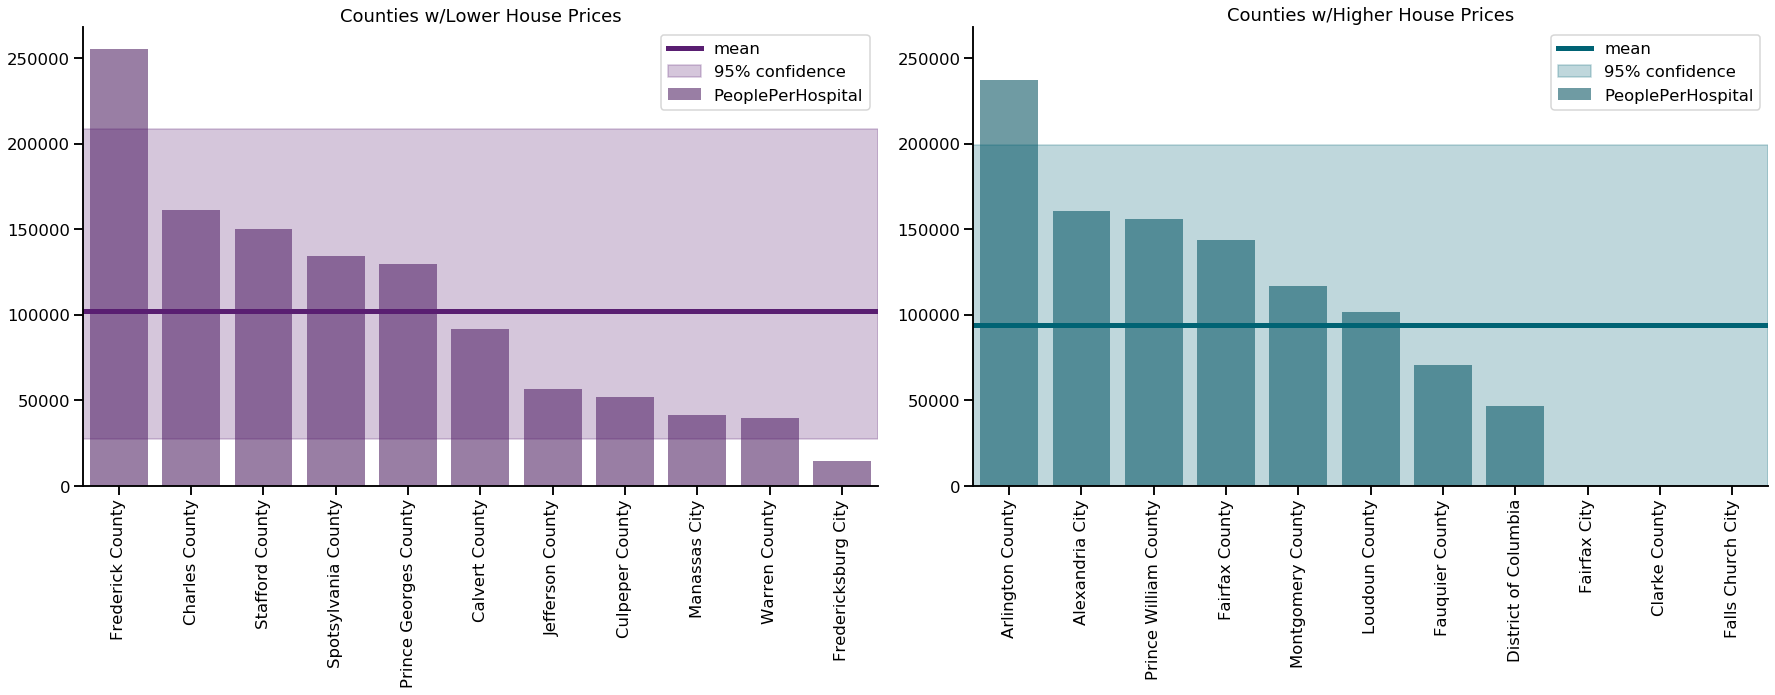

In [88]:
barplots_side_by_side(dcmi, 'RegionName', 'PeoplePerHospital', 'Counties w/Lower House Prices', 'Counties w/Higher House Prices');

In [89]:
ztest (dcmi.low_price_counties['PeoplePerSchool'], dcmi.high_price_counties['PeoplePerSchool'])

(0.41487340816509116, 0.6782345773522396)

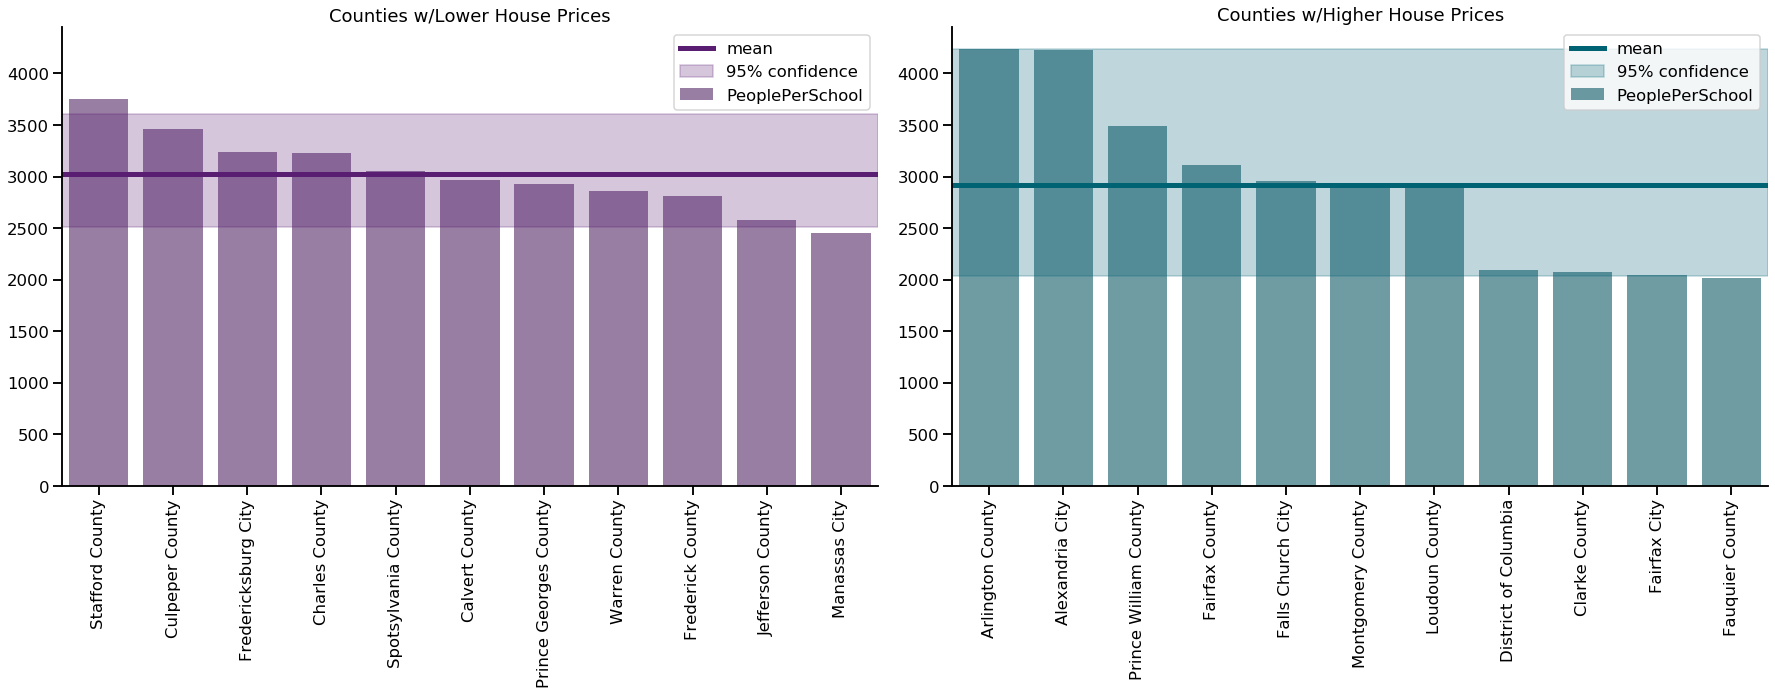

In [90]:
barplots_side_by_side(dcmi, 'RegionName', 'PeoplePerSchool', 'Counties w/Lower House Prices', 'Counties w/Higher House Prices');

In [91]:
ztest (dcmi.low_price_counties['PercentPrivateSchools'], dcmi.high_price_counties['PercentPrivateSchools'])

(-2.6318370223362892, 0.008492459061615488)

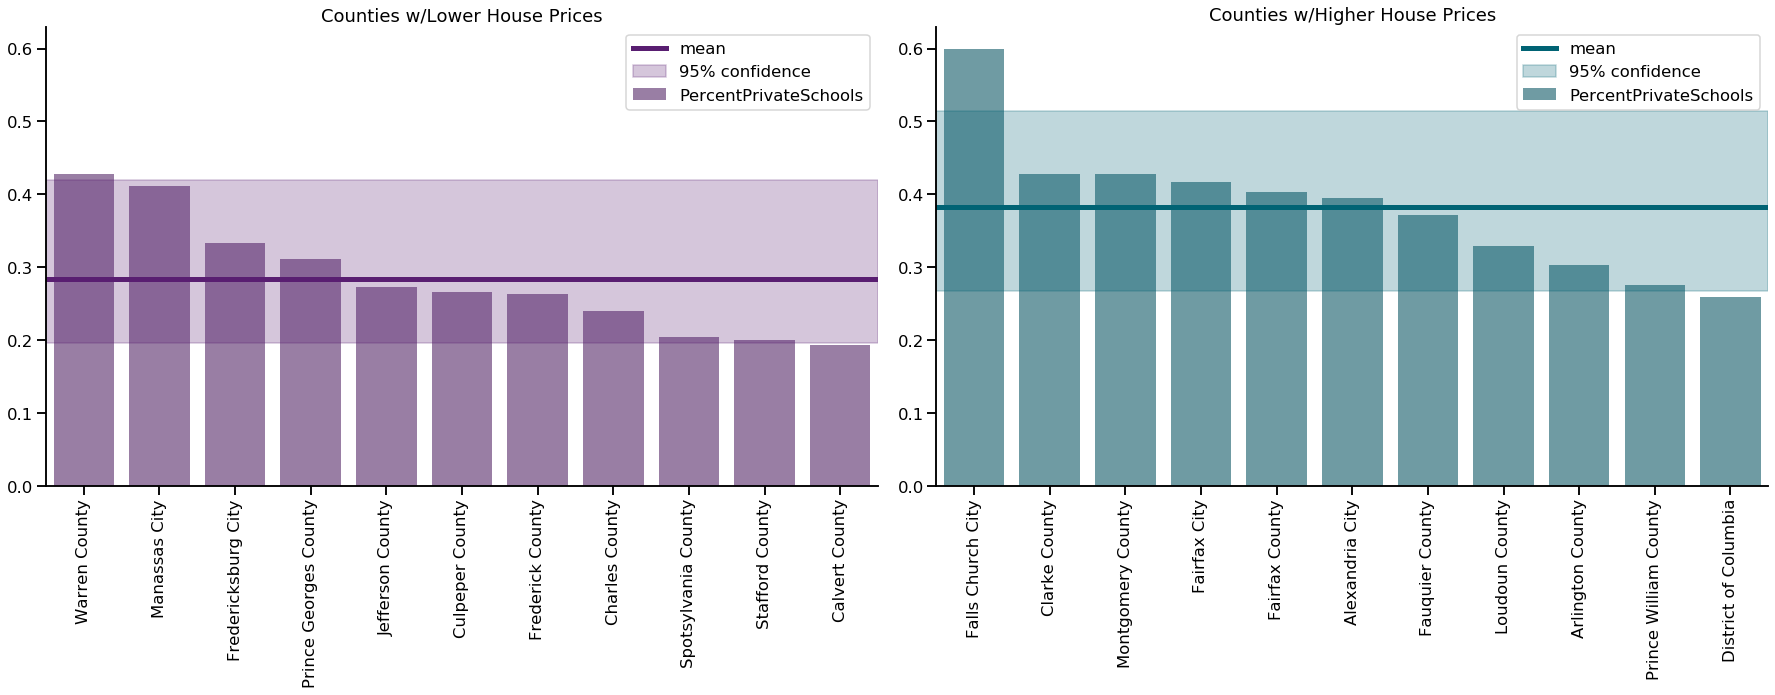

In [92]:
barplots_side_by_side(dcmi, 'RegionName', 'PercentPrivateSchools', 'Counties w/Lower House Prices', 'Counties w/Higher House Prices');

In [93]:
ztest (dcmi.low_price_counties['NumberOfPrivateSchools'] / dcmi.low_price_counties['Population'], 
       dcmi.high_price_counties['NumberOfPrivateSchools'] / dcmi.high_price_counties['Population'])

(-2.372554466283912, 0.017665558355976503)

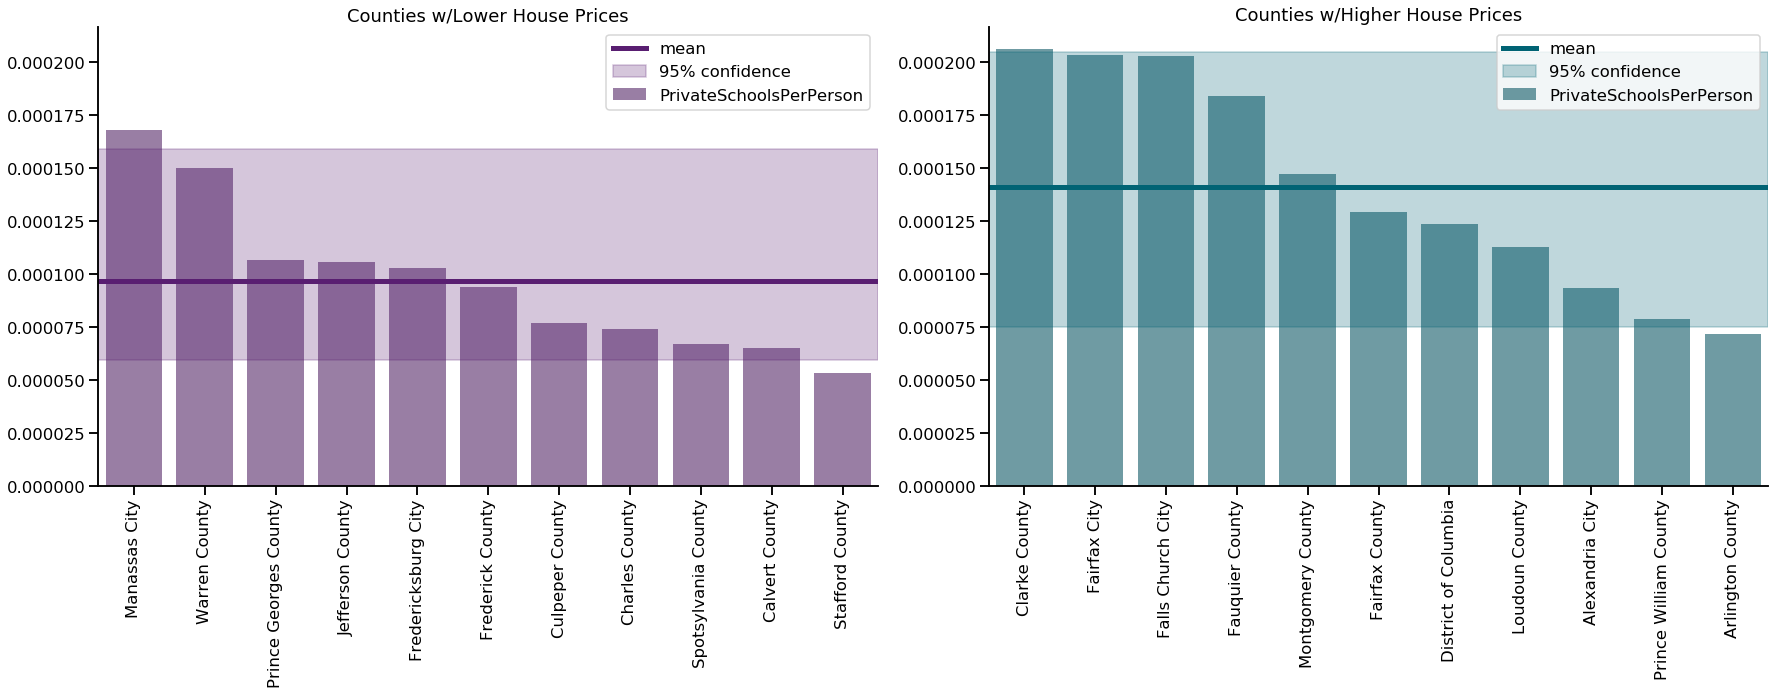

In [94]:
barplots_side_by_side(dcmi, 'RegionName', 'PrivateSchoolsPerPerson', 'Counties w/Lower House Prices', 'Counties w/Higher House Prices');

In [95]:
ztest (dcmi.low_price_counties['NumberOfPublicSchools'] / dcmi.low_price_counties['Population'], 
       dcmi.high_price_counties['NumberOfPublicSchools'] / dcmi.high_price_counties['Population'])

(0.4811415006000532, 0.6304159343470777)

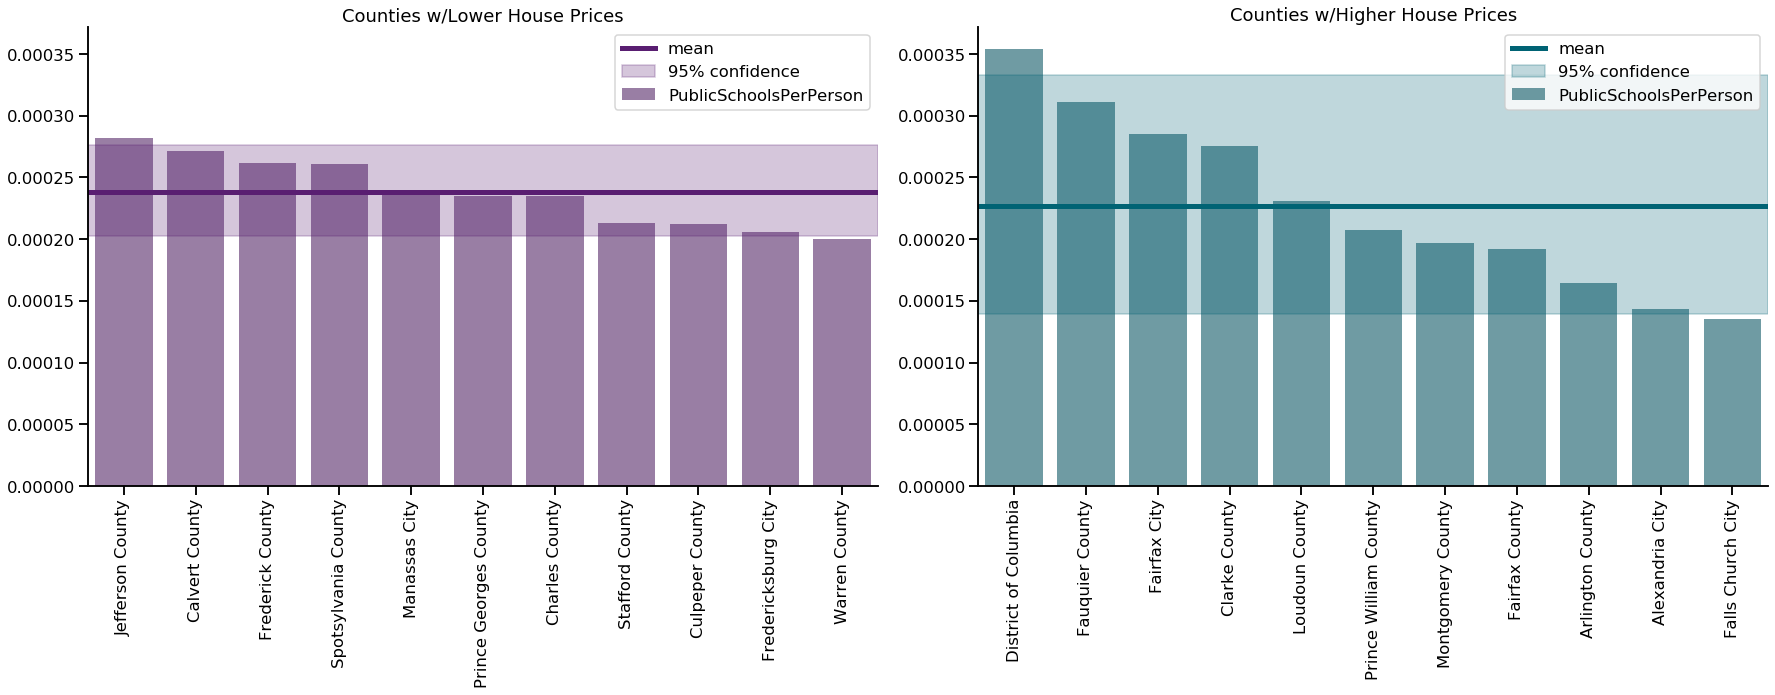

In [96]:
barplots_side_by_side(dcmi, 'RegionName', 'PublicSchoolsPerPerson', 'Counties w/Lower House Prices', 'Counties w/Higher House Prices');

<p></p>
<p></p>
<p></p>
   

<a href='#top'>Back to Top ↑</a>

<p></p>
<p></p>
<p></p>

<a id='findings'></a>
### Findings

#### <b>Statistically significant findings:</b>

- Counties with higher house prices have more private schools per person

- Counties with higher house prices have a higher % of private schools

#### <b>No clear relationship:</b>

- No clear relationship between house prices & number of hospitals

- No clear relationship between house prices & people per school

<a href='#top'>Back to Top ↑</a>

<a id='nextsteps'></a>
### Next Steps

1. Analyze factors that may help to predict house prices in the Washington DC metro area. 

2. Work with more granular data to enable insights on the neighborhood, zip code, and individual home level. 

3. Perform regression analysis to help identify relationships between factors and house prices.

<a href='#top'>Back to Top ↑</a>